In [1]:
import numpy as np
from time import time
import scipy as sc
import matplotlib.pyplot as plt
import sys
import seaborn as sns
%matplotlib inline

In [2]:
sys.path.append('./lib/source/')

from errors import *
from data import *
from methods import *

In [3]:
def get_results(data_type, exp_num, method):
    RMSE_ = np.loadtxt('./results/'+data_type+'/exper_'+str(exp_num)+'/'+method+'_rmse.txt')
    time_ = np.loadtxt('./results/'+data_type+'/exper_'+str(exp_num)+'/'+method+'_time.txt')
    return np.array(RMSE_).reshape(-1), np.array(time_).reshape(-1)

# Experiments with synthetic data

## 1 Fixed matrix size, fixed rank, different number of samples

In [14]:
sample_fraction_array = np.linspace(0.1, 0.9, 15)
rank = 5
dims = (500, 500)
max_iter = int(1e3)
tol = 1e-3

M = get_data('synthetic', rank, dims, noise='y')

In [4]:
def syn_exper_1(method, M, rank, dims, max_iter, tol, sample_fraction_array, data_type='synthetic'):
    RMSE_array = []
    time_array = []
    for sample_fraction in sample_fraction_array:
        nsamp = int(sample_fraction * np.prod(dims))
        omega = sampling_operator(nsamp, dims)
        data = get_sampling_vector(M, omega)
        t0 = time()
        X_opt = get_completion(omega, data, rank, dims, method, max_iter, tol, verbose=False)
        t1 = time()
        RMSE_array.append(RMSE(X_opt, M))
        time_array.append(t1-t0)

        print 'Sample fraction: %.2f. RMSE error: %.6f. Time: %d min %d sec.' % \
        (sample_fraction, RMSE(X_opt, M), int(t1-t0) // 60, int(t1-t0) % 60)
    RMSE_ = np.array(RMSE_array)
    time_ = np.array(time_array)
    np.savetxt('./results/'+data_type+'/exper_1/'+method+'_rmse.txt', RMSE_)
    np.savetxt('./results/'+data_type+'/exper_1/'+method+'_time.txt', time_)

In [16]:
syn_exper_1('SoftImpute', M, rank, dims, max_iter, tol, sample_fraction_array)

Sample fraction: 0.10. RMSE error: 0.083617. Time: 0 min 7 sec.
Sample fraction: 0.16. RMSE error: 0.065788. Time: 0 min 8 sec.
Sample fraction: 0.21. RMSE error: 0.057772. Time: 0 min 9 sec.
Sample fraction: 0.27. RMSE error: 0.052812. Time: 0 min 9 sec.
Sample fraction: 0.33. RMSE error: 0.048927. Time: 0 min 10 sec.
Sample fraction: 0.39. RMSE error: 0.045795. Time: 0 min 11 sec.
Sample fraction: 0.44. RMSE error: 0.042951. Time: 0 min 11 sec.
Sample fraction: 0.50. RMSE error: 0.040068. Time: 0 min 11 sec.
Sample fraction: 0.56. RMSE error: 0.037372. Time: 0 min 12 sec.
Sample fraction: 0.61. RMSE error: 0.034618. Time: 0 min 12 sec.
Sample fraction: 0.67. RMSE error: 0.031756. Time: 0 min 12 sec.
Sample fraction: 0.73. RMSE error: 0.028610. Time: 0 min 12 sec.
Sample fraction: 0.79. RMSE error: 0.025257. Time: 0 min 12 sec.
Sample fraction: 0.84. RMSE error: 0.021532. Time: 0 min 11 sec.
Sample fraction: 0.90. RMSE error: 0.016939. Time: 0 min 11 sec.


In [17]:
syn_exper_1('SVP', M, rank, dims, max_iter, tol, sample_fraction_array)

Sample fraction: 0.10. RMSE error: 0.004230. Time: 0 min 2 sec.
Sample fraction: 0.16. RMSE error: 0.003216. Time: 0 min 1 sec.
Sample fraction: 0.21. RMSE error: 0.002530. Time: 0 min 1 sec.
Sample fraction: 0.27. RMSE error: 0.002147. Time: 0 min 1 sec.
Sample fraction: 0.33. RMSE error: 0.002381. Time: 0 min 1 sec.
Sample fraction: 0.39. RMSE error: 0.001722. Time: 0 min 0 sec.
Sample fraction: 0.44. RMSE error: 0.001824. Time: 0 min 1 sec.
Sample fraction: 0.50. RMSE error: 0.001649. Time: 0 min 2 sec.
Sample fraction: 0.56. RMSE error: 0.001949. Time: 0 min 4 sec.
Sample fraction: 0.61. RMSE error: 0.002028. Time: 0 min 46 sec.
Sample fraction: 0.67. RMSE error: 0.001810. Time: 0 min 10 sec.
Sample fraction: 0.73. RMSE error: 0.001522. Time: 0 min 10 sec.
Sample fraction: 0.79. RMSE error: 0.001759. Time: 0 min 9 sec.
Sample fraction: 0.84. RMSE error: 0.001686. Time: 0 min 9 sec.
Sample fraction: 0.90. RMSE error: 0.002151. Time: 0 min 12 sec.


In [18]:
syn_exper_1('SVT', M, rank, dims, max_iter, tol, sample_fraction_array)

Sample fraction: 0.10. RMSE error: 0.004017. Time: 0 min 7 sec.
Sample fraction: 0.16. RMSE error: 0.003299. Time: 0 min 4 sec.
Sample fraction: 0.21. RMSE error: 0.002990. Time: 0 min 4 sec.
Sample fraction: 0.27. RMSE error: 0.002834. Time: 0 min 4 sec.
Sample fraction: 0.33. RMSE error: 0.002691. Time: 0 min 4 sec.
Sample fraction: 0.39. RMSE error: 0.002671. Time: 0 min 5 sec.
Sample fraction: 0.44. RMSE error: 0.002642. Time: 0 min 5 sec.
Sample fraction: 0.50. RMSE error: 0.002361. Time: 0 min 5 sec.
Sample fraction: 0.56. RMSE error: 0.002442. Time: 0 min 5 sec.
Sample fraction: 0.61. RMSE error: 0.002253. Time: 0 min 6 sec.
Sample fraction: 0.67. RMSE error: 0.002209. Time: 0 min 6 sec.
Sample fraction: 0.73. RMSE error: 0.002285. Time: 0 min 6 sec.
Sample fraction: 0.79. RMSE error: 0.002115. Time: 0 min 6 sec.
Sample fraction: 0.84. RMSE error: 0.002217. Time: 0 min 6 sec.
Sample fraction: 0.90. RMSE error: 0.002247. Time: 0 min 6 sec.


In [41]:
RMSE_si, time_si = get_results('synthetic', 1, 'SoftImpute')
RMSE_svp, time_svp = get_results('synthetic', 1, 'SVP')
RMSE_svt, time_svt = get_results('synthetic', 1, 'SVT')

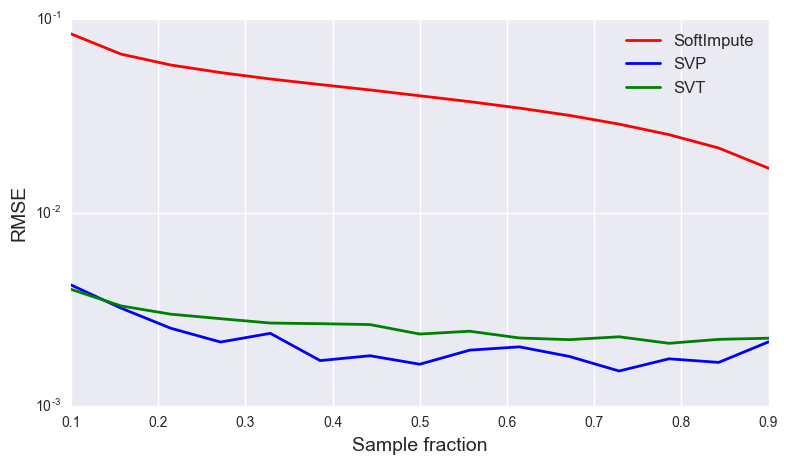

In [42]:
plt.figure(figsize=(9,5))
plt.xlim((0.1, 0.9))
plt.semilogy(sample_fraction_array, RMSE_si, 'r', linewidth=2)
plt.semilogy(sample_fraction_array, RMSE_svp, 'b', linewidth=2)
plt.semilogy(sample_fraction_array, RMSE_svt, 'g', linewidth=2)
plt.legend(['SoftImpute', 'SVP', 'SVT'], fontsize=12)
plt.xlabel('Sample fraction', fontsize=14)
plt.ylabel('RMSE', fontsize=14)
plt.savefig('./results/synthetic/exper_1/synthetic_nsamp_rmse.png')
plt.show()

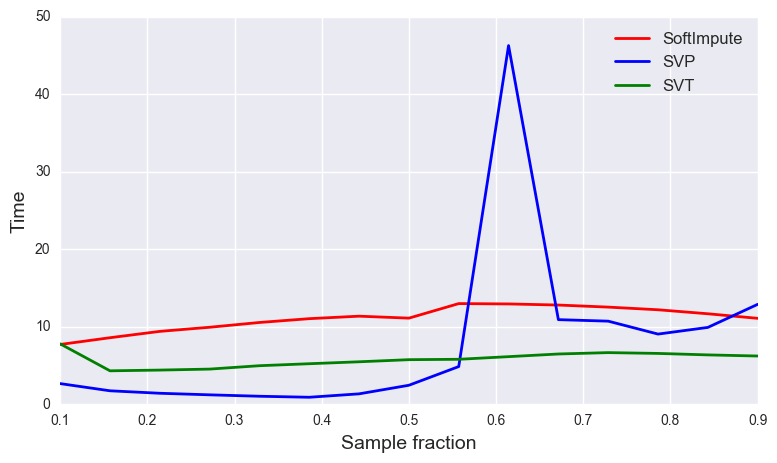

In [43]:
plt.figure(figsize=(9,5))
plt.xlim((0.1, 0.9))
plt.plot(sample_fraction_array, time_si, 'r', linewidth=2)
plt.plot(sample_fraction_array, time_svp, 'b', linewidth=2)
plt.plot(sample_fraction_array, time_svt, 'g', linewidth=2)
plt.legend(['SoftImpute', 'SVP', 'SVT'], fontsize=12)
plt.xlabel('Sample fraction', fontsize=14)
plt.ylabel('Time', fontsize=14)
plt.savefig('./results/synthetic/exper_1/synthetic_nsamp_time.png')
plt.show()

## 2 Fixed matrix size, fixed number of samples, different rank

In [44]:
sample_fraction = 0.2
rank_array = range(1, 32, 3)
dims = (300, 300)
max_iter = int(1e3)
tol = 1e-3

nsamp = int(sample_fraction * np.prod(dims))
omega = sampling_operator(nsamp, dims)

In [5]:
def syn_exper_2(method, nsamp, omega, dims, max_iter, tol, rank_array, data_type='synthetic'):
    RMSE_array = []
    time_array = []
    for rank in rank_array:
        M = get_data('synthetic', rank, dims, noise='y')
        data = get_sampling_vector(M, omega)
        t0 = time()
        X_opt = get_completion(omega, data, rank, dims, method, max_iter, tol, verbose=False)
        t1 = time()
        RMSE_array.append(RMSE(X_opt, M))
        time_array.append(t1-t0)

        print 'Matrix rank: %d. RMSE error: %.6f. Time: %d min %d sec.' % \
        (rank, RMSE(X_opt, M), int(t1-t0) // 60, int(t1-t0) % 60)
    RMSE_ = np.array(RMSE_array)
    time_ = np.array(time_array)
    np.savetxt('./results/'+data_type+'/exper_2/'+method+'_rmse.txt', RMSE_)
    np.savetxt('./results/'+data_type+'/exper_2/'+method+'_time.txt', time_)

In [48]:
syn_exper_2('SoftImpute', nsamp, omega, dims, max_iter, tol, rank_array)

Matrix rank: 1. RMSE error: 0.021562. Time: 0 min 3 sec.
Matrix rank: 4. RMSE error: 0.056964. Time: 0 min 3 sec.
Matrix rank: 7. RMSE error: 0.103872. Time: 0 min 4 sec.
Matrix rank: 10. RMSE error: 0.160192. Time: 0 min 4 sec.
Matrix rank: 13. RMSE error: 0.230075. Time: 0 min 4 sec.
Matrix rank: 16. RMSE error: 0.327031. Time: 0 min 4 sec.
Matrix rank: 19. RMSE error: 0.490498. Time: 0 min 4 sec.
Matrix rank: 22. RMSE error: 0.651942. Time: 0 min 4 sec.
Matrix rank: 25. RMSE error: 0.958278. Time: 0 min 4 sec.
Matrix rank: 28. RMSE error: 1.327688. Time: 0 min 4 sec.
Matrix rank: 31. RMSE error: 2.120813. Time: 0 min 5 sec.


In [49]:
syn_exper_2('SVP', nsamp, omega, dims, max_iter, tol, rank_array)

Matrix rank: 1. RMSE error: 0.001052. Time: 0 min 0 sec.
Matrix rank: 4. RMSE error: 0.002693. Time: 0 min 0 sec.
Matrix rank: 7. RMSE error: 0.005658. Time: 0 min 0 sec.
Matrix rank: 10. RMSE error: 0.007108. Time: 0 min 1 sec.
Matrix rank: 13. RMSE error: 0.011154. Time: 0 min 1 sec.
Matrix rank: 16. RMSE error: 0.014488. Time: 0 min 2 sec.
Matrix rank: 19. RMSE error: 0.018875. Time: 0 min 3 sec.
Matrix rank: 22. RMSE error: 0.027415. Time: 0 min 5 sec.
Matrix rank: 25. RMSE error: 0.043461. Time: 0 min 11 sec.
Matrix rank: 28. RMSE error: 0.560465. Time: 0 min 28 sec.
Matrix rank: 31. RMSE error: 4.493269. Time: 0 min 30 sec.


In [50]:
syn_exper_2('SVT', nsamp, omega, dims, max_iter, tol, rank_array)

Matrix rank: 1. RMSE error: 0.001061. Time: 0 min 1 sec.
Matrix rank: 4. RMSE error: 0.002993. Time: 0 min 2 sec.
Matrix rank: 7. RMSE error: 0.101491. Time: 0 min 45 sec.
Matrix rank: 10. RMSE error: 0.237784. Time: 1 min 17 sec.
Matrix rank: 13. RMSE error: 1.511546. Time: 2 min 7 sec.
Matrix rank: 16. RMSE error: 2.515321. Time: 2 min 6 sec.
Matrix rank: 19. RMSE error: 3.336250. Time: 2 min 8 sec.
Matrix rank: 22. RMSE error: 3.841643. Time: 2 min 18 sec.
Matrix rank: 25. RMSE error: 4.341873. Time: 2 min 4 sec.
Matrix rank: 28. RMSE error: 4.667700. Time: 2 min 13 sec.
Matrix rank: 31. RMSE error: 5.064963. Time: 2 min 13 sec.


In [68]:
RMSE_si, time_si = get_results('synthetic', 2, 'SoftImpute')
RMSE_svp, time_svp = get_results('synthetic', 2, 'SVP')
RMSE_svt, time_svt = get_results('synthetic', 2, 'SVT')

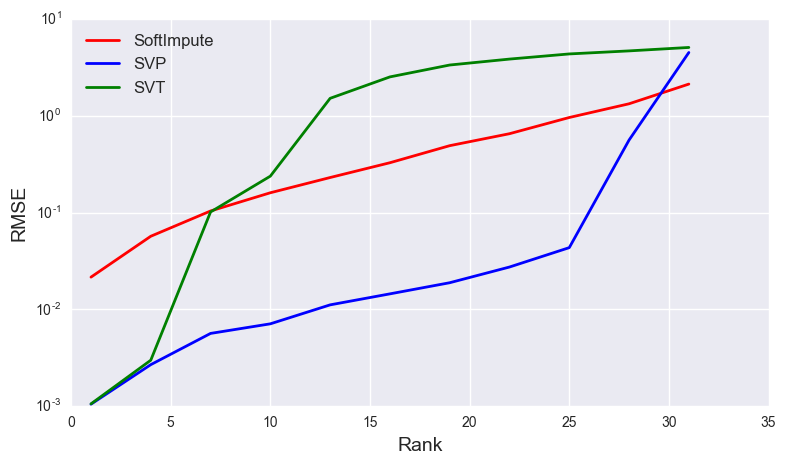

In [69]:
plt.figure(figsize=(9,5))
plt.semilogy(rank_array, RMSE_si, 'r', linewidth=2)
plt.semilogy(rank_array, RMSE_svp, 'b', linewidth=2)
plt.semilogy(rank_array, RMSE_svt, 'g', linewidth=2)
plt.legend(['SoftImpute', 'SVP', 'SVT'], loc=2, fontsize=12)
plt.xlabel('Rank', fontsize=14)
plt.ylabel('RMSE', fontsize=14)
plt.savefig('./results/synthetic/exper_2/synthetic_rank_rmse.png')
plt.show()

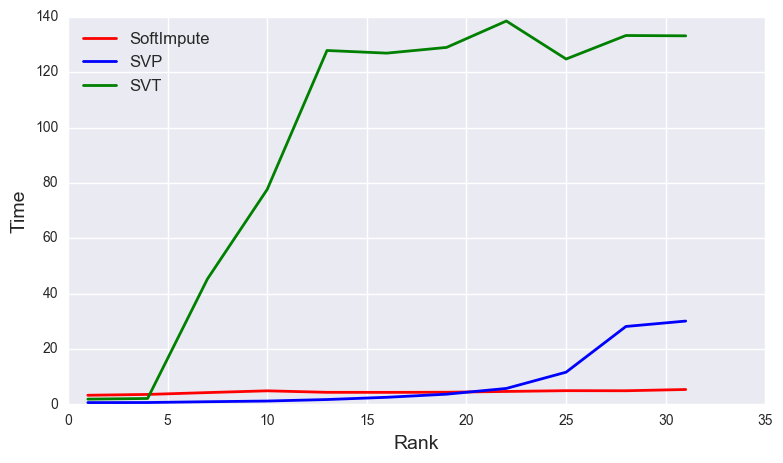

In [70]:
plt.figure(figsize=(9,5))
plt.plot(rank_array, time_si, 'r', linewidth=2)
plt.plot(rank_array, time_svp, 'b', linewidth=2)
plt.plot(rank_array, time_svt, 'g', linewidth=2)
plt.legend(['SoftImpute', 'SVP', 'SVT'], loc=2, fontsize=12)
plt.xlabel('Rank', fontsize=14)
plt.ylabel('Time', fontsize=14)
plt.savefig('./results/synthetic/exper_2/synthetic_rank_time.png')
plt.show()

## 3 Different matrix size, fixed number of samples, different rank

In [75]:
sample_fraction = 0.2
rank = 5
size_array = range(150, 651, 50)
max_iter = int(1e3)
tol = 1e-3

In [6]:
def syn_exper_3(method, rank, max_iter, tol, size_array, data_type='synthetic'):
    RMSE_array = []
    time_array = []
    for size_ in size_array:
        dims = (size_, size_)
        nsamp = int(sample_fraction * np.prod(dims))
        omega = sampling_operator(nsamp, dims)
        M = get_data('synthetic', rank, dims, noise='y')
        data = get_sampling_vector(M, omega)
        t0 = time()
        X_opt = get_completion(omega, data, rank, dims, method, max_iter, tol, verbose=False)
        t1 = time()
        RMSE_array.append(RMSE(X_opt, M))
        time_array.append(t1-t0)

        print 'Matrix size: %d. RMSE error: %.6f. Time: %d min %d sec.' % \
        (size_, RMSE(X_opt, M), int(t1-t0) // 60, int(t1-t0) % 60)
    RMSE_ = np.array(RMSE_array)
    time_ = np.array(time_array)
    np.savetxt('./results/'+data_type+'/exper_3/'+method+'_rmse.txt', RMSE_)
    np.savetxt('./results/'+data_type+'/exper_3/'+method+'_time.txt', time_)

In [77]:
syn_exper_3('SoftImpute', rank, max_iter, tol, size_array)

Matrix rank: 5. RMSE error: 0.143922. Time: 0 min 1 sec.
Matrix rank: 5. RMSE error: 0.094779. Time: 0 min 1 sec.
Matrix rank: 5. RMSE error: 0.087844. Time: 0 min 2 sec.
Matrix rank: 5. RMSE error: 0.071205. Time: 0 min 3 sec.
Matrix rank: 5. RMSE error: 0.067082. Time: 0 min 4 sec.
Matrix rank: 5. RMSE error: 0.065987. Time: 0 min 5 sec.
Matrix rank: 5. RMSE error: 0.064682. Time: 0 min 7 sec.
Matrix rank: 5. RMSE error: 0.059398. Time: 0 min 8 sec.
Matrix rank: 5. RMSE error: 0.058992. Time: 0 min 10 sec.
Matrix rank: 5. RMSE error: 0.058531. Time: 0 min 12 sec.
Matrix rank: 5. RMSE error: 0.054846. Time: 0 min 14 sec.


In [78]:
syn_exper_3('SVP', rank, max_iter, tol, size_array)

Matrix rank: 5. RMSE error: 0.005712. Time: 0 min 0 sec.
Matrix rank: 5. RMSE error: 0.005032. Time: 0 min 0 sec.
Matrix rank: 5. RMSE error: 0.004315. Time: 0 min 0 sec.
Matrix rank: 5. RMSE error: 0.003226. Time: 0 min 0 sec.
Matrix rank: 5. RMSE error: 0.003601. Time: 0 min 0 sec.
Matrix rank: 5. RMSE error: 0.003111. Time: 0 min 1 sec.
Matrix rank: 5. RMSE error: 0.002852. Time: 0 min 1 sec.
Matrix rank: 5. RMSE error: 0.002686. Time: 0 min 1 sec.
Matrix rank: 5. RMSE error: 0.003185. Time: 0 min 1 sec.
Matrix rank: 5. RMSE error: 0.002906. Time: 0 min 1 sec.
Matrix rank: 5. RMSE error: 0.002941. Time: 0 min 2 sec.


In [79]:
syn_exper_3('SVT', rank, max_iter, tol, size_array)

Matrix rank: 5. RMSE error: 0.704205. Time: 0 min 27 sec.
Matrix rank: 5. RMSE error: 0.084932. Time: 0 min 20 sec.
Matrix rank: 5. RMSE error: 0.004188. Time: 0 min 2 sec.
Matrix rank: 5. RMSE error: 0.003510. Time: 0 min 2 sec.
Matrix rank: 5. RMSE error: 0.003501. Time: 0 min 2 sec.
Matrix rank: 5. RMSE error: 0.003463. Time: 0 min 3 sec.
Matrix rank: 5. RMSE error: 0.003288. Time: 0 min 4 sec.
Matrix rank: 5. RMSE error: 0.003038. Time: 0 min 4 sec.
Matrix rank: 5. RMSE error: 0.003013. Time: 0 min 5 sec.
Matrix rank: 5. RMSE error: 0.002914. Time: 0 min 5 sec.
Matrix rank: 5. RMSE error: 0.002787. Time: 0 min 6 sec.


In [80]:
RMSE_si, time_si = get_results('synthetic', 3, 'SoftImpute')
RMSE_svp, time_svp = get_results('synthetic', 3, 'SVP')
RMSE_svt, time_svt = get_results('synthetic', 3, 'SVT')

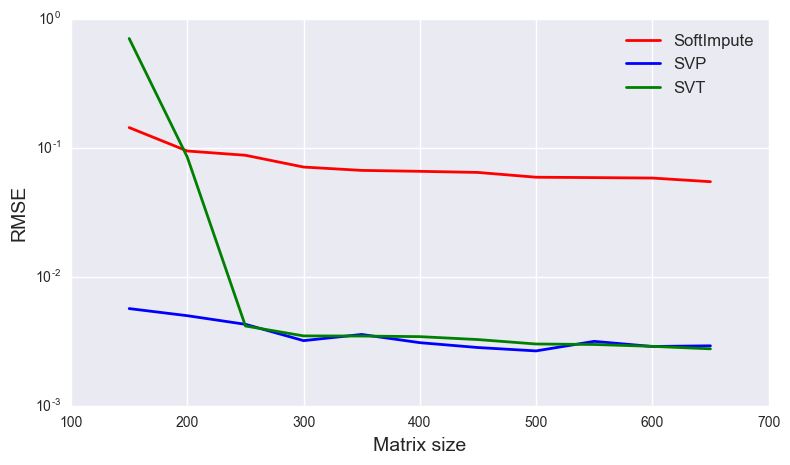

In [81]:
plt.figure(figsize=(9,5))
plt.semilogy(size_array, RMSE_si, 'r', linewidth=2)
plt.semilogy(size_array, RMSE_svp, 'b', linewidth=2)
plt.semilogy(size_array, RMSE_svt, 'g', linewidth=2)
plt.legend(['SoftImpute', 'SVP', 'SVT'], fontsize=12)
plt.xlabel('Matrix size', fontsize=14)
plt.ylabel('RMSE', fontsize=14)
plt.savefig('./results/synthetic/exper_3/synthetic_size_rmse.png')
plt.show()

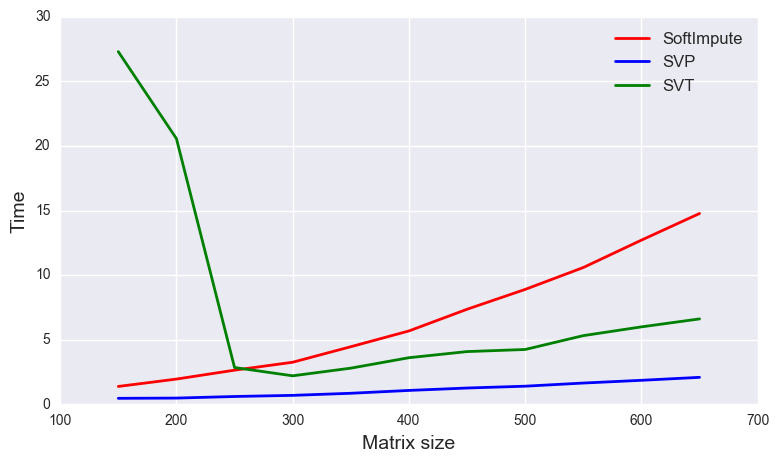

In [82]:
plt.figure(figsize=(9,5))
plt.plot(size_array, time_si, 'r', linewidth=2)
plt.plot(size_array, time_svp, 'b', linewidth=2)
plt.plot(size_array, time_svt, 'g', linewidth=2)
plt.legend(['SoftImpute', 'SVP', 'SVT'], fontsize=12)
plt.xlabel('Matrix size', fontsize=14)
plt.ylabel('Time', fontsize=14)
plt.savefig('./results/synthetic/exper_3/synthetic_size_time.png')
plt.show()

# Real data experiment

### Exper 1

In [7]:
sample_fraction_array = np.linspace(0.1, 0.9, 9)
rank = 5
max_iter = int(1e3)
tol = 1e-3

M = get_data('real', -1, -1, row_num=500)
max_M = np.max(M)
M /= max_M
dims = M.shape

In [8]:
syn_exper_1('SoftImpute', M, rank, dims, max_iter, tol, sample_fraction_array, 'real')

Sample fraction: 0.10. RMSE error: 0.642841. Time: 0 min 1 sec.
Sample fraction: 0.20. RMSE error: 0.485044. Time: 0 min 2 sec.
Sample fraction: 0.30. RMSE error: 0.397421. Time: 0 min 2 sec.
Sample fraction: 0.40. RMSE error: 0.336257. Time: 0 min 2 sec.
Sample fraction: 0.50. RMSE error: 0.294667. Time: 0 min 2 sec.
Sample fraction: 0.60. RMSE error: 0.259145. Time: 0 min 2 sec.
Sample fraction: 0.70. RMSE error: 0.221306. Time: 0 min 2 sec.
Sample fraction: 0.80. RMSE error: 0.179821. Time: 0 min 2 sec.
Sample fraction: 0.90. RMSE error: 0.128237. Time: 0 min 2 sec.


In [9]:
syn_exper_1('SVP', M, rank, dims, max_iter, tol, sample_fraction_array, 'real')

Sample fraction: 0.10. RMSE error: 0.985811. Time: 0 min 7 sec.
Sample fraction: 0.20. RMSE error: 0.678847. Time: 0 min 26 sec.
Sample fraction: 0.30. RMSE error: 0.498302. Time: 0 min 19 sec.
Sample fraction: 0.40. RMSE error: 0.420960. Time: 0 min 26 sec.
Sample fraction: 0.50. RMSE error: 0.388742. Time: 0 min 32 sec.
Sample fraction: 0.60. RMSE error: 0.381957. Time: 0 min 38 sec.
Sample fraction: 0.70. RMSE error: 0.382565. Time: 0 min 45 sec.
Sample fraction: 0.80. RMSE error: 0.387641. Time: 0 min 50 sec.
Sample fraction: 0.90. RMSE error: 0.396900. Time: 0 min 57 sec.


In [10]:
syn_exper_1('SVT', M, rank, dims, max_iter, tol, sample_fraction_array, 'real')

Sample fraction: 0.10. RMSE error: 0.654471. Time: 0 min 56 sec.
Sample fraction: 0.20. RMSE error: 0.813661. Time: 1 min 24 sec.
Sample fraction: 0.30. RMSE error: 0.983798. Time: 1 min 45 sec.
Sample fraction: 0.40. RMSE error: 1.143737. Time: 1 min 43 sec.
Sample fraction: 0.50. RMSE error: 1.248379. Time: 1 min 49 sec.
Sample fraction: 0.60. RMSE error: 1.355962. Time: 1 min 50 sec.
Sample fraction: 0.70. RMSE error: 1.446661. Time: 2 min 2 sec.
Sample fraction: 0.80. RMSE error: 1.564249. Time: 2 min 3 sec.
Sample fraction: 0.90. RMSE error: 1.662049. Time: 2 min 11 sec.


In [12]:
RMSE_si, time_si = get_results('real', 1, 'SoftImpute')
RMSE_svp, time_svp = get_results('real', 1, 'SVP')
RMSE_svt, time_svt = get_results('real', 1, 'SVT')

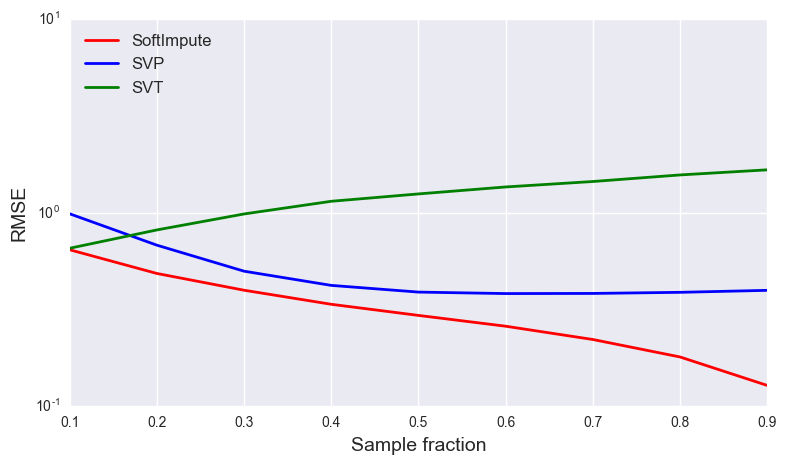

In [13]:
plt.figure(figsize=(9,5))
plt.xlim((0.1, 0.9))
plt.semilogy(sample_fraction_array, RMSE_si, 'r', linewidth=2)
plt.semilogy(sample_fraction_array, RMSE_svp, 'b', linewidth=2)
plt.semilogy(sample_fraction_array, RMSE_svt, 'g', linewidth=2)
plt.legend(['SoftImpute', 'SVP', 'SVT'], loc=2, fontsize=12)
plt.xlabel('Sample fraction', fontsize=14)
plt.ylabel('RMSE', fontsize=14)
plt.savefig('./results/real/exper_1/real_nsamp_rmse.png')
plt.show()

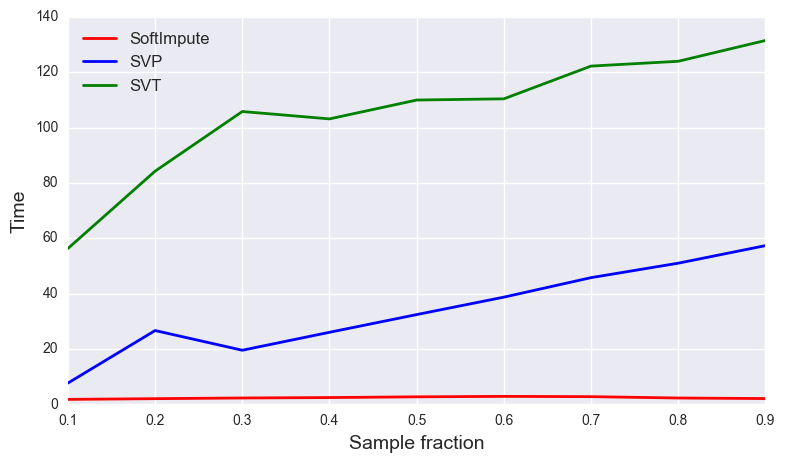

In [14]:
plt.figure(figsize=(9,5))
plt.xlim((0.1, 0.9))
plt.plot(sample_fraction_array, time_si, 'r', linewidth=2)
plt.plot(sample_fraction_array, time_svp, 'b', linewidth=2)
plt.plot(sample_fraction_array, time_svt, 'g', linewidth=2)
plt.legend(['SoftImpute', 'SVP', 'SVT'], loc=2, fontsize=12)
plt.xlabel('Sample fraction', fontsize=14)
plt.ylabel('Time', fontsize=14)
plt.savefig('./results/real/exper_1/real_nsamp_time.png')
plt.show()

### Exper 3

In [15]:
sample_fraction = 0.2
rank = 5
size_array = range(150, 501, 50)
max_iter = int(1e3)
tol = 1e-3

In [16]:
def syn_exper_3_real(method, rank, max_iter, tol, size_array, data_type='synthetic'):
    RMSE_array = []
    time_array = []
    for size_ in size_array:
        M = get_data('real', -1, -1, row_num=size_)
        max_M = np.max(M)
        M /= max_M
        dims = M.shape
        nsamp = int(sample_fraction * np.prod(dims))
        omega = sampling_operator(nsamp, dims)
        data = get_sampling_vector(M, omega)
        t0 = time()
        X_opt = get_completion(omega, data, rank, dims, method, max_iter, tol, verbose=False)
        t1 = time()
        RMSE_array.append(RMSE(X_opt, M))
        time_array.append(t1-t0)

        print 'Matrix size: %d. RMSE error: %.6f. Time: %d min %d sec.' % \
        (size_, RMSE(X_opt, M), int(t1-t0) // 60, int(t1-t0) % 60)
    RMSE_ = np.array(RMSE_array)
    time_ = np.array(time_array)
    np.savetxt('./results/'+data_type+'/exper_3/'+method+'_rmse.txt', RMSE_)
    np.savetxt('./results/'+data_type+'/exper_3/'+method+'_time.txt', time_)

In [17]:
syn_exper_3_real('SoftImpute', rank, max_iter, tol, size_array, 'real')

Matrix size: 150. RMSE error: 0.544499. Time: 0 min 1 sec.
Matrix size: 200. RMSE error: 0.564754. Time: 0 min 1 sec.
Matrix size: 250. RMSE error: 0.528027. Time: 0 min 1 sec.
Matrix size: 300. RMSE error: 0.527873. Time: 0 min 1 sec.
Matrix size: 350. RMSE error: 0.506993. Time: 0 min 1 sec.
Matrix size: 400. RMSE error: 0.495244. Time: 0 min 1 sec.
Matrix size: 450. RMSE error: 0.488715. Time: 0 min 1 sec.
Matrix size: 500. RMSE error: 0.485044. Time: 0 min 2 sec.


In [18]:
syn_exper_3_real('SVP', rank, max_iter, tol, size_array, 'real')

Matrix size: 150. RMSE error: 0.985245. Time: 0 min 4 sec.
Matrix size: 200. RMSE error: 0.936748. Time: 0 min 6 sec.
Matrix size: 250. RMSE error: 0.862257. Time: 0 min 7 sec.
Matrix size: 300. RMSE error: 0.715640. Time: 0 min 8 sec.
Matrix size: 350. RMSE error: 0.751181. Time: 0 min 11 sec.
Matrix size: 400. RMSE error: 0.762126. Time: 0 min 13 sec.
Matrix size: 450. RMSE error: 0.699298. Time: 0 min 14 sec.
Matrix size: 500. RMSE error: 0.678847. Time: 0 min 31 sec.


In [19]:
syn_exper_3_real('SVT', rank, max_iter, tol, size_array, 'real')

Matrix size: 150. RMSE error: 0.700791. Time: 0 min 45 sec.
Matrix size: 200. RMSE error: 0.739556. Time: 0 min 56 sec.
Matrix size: 250. RMSE error: 0.789823. Time: 1 min 5 sec.
Matrix size: 300. RMSE error: 0.819800. Time: 1 min 16 sec.
Matrix size: 350. RMSE error: 0.817335. Time: 1 min 15 sec.
Matrix size: 400. RMSE error: 0.791749. Time: 1 min 19 sec.
Matrix size: 450. RMSE error: 0.835118. Time: 1 min 24 sec.
Matrix size: 500. RMSE error: 0.816562. Time: 1 min 27 sec.


In [20]:
RMSE_si, time_si = get_results('real', 3, 'SoftImpute')
RMSE_svp, time_svp = get_results('real', 3, 'SVP')
RMSE_svt, time_svt = get_results('real', 3, 'SVT')

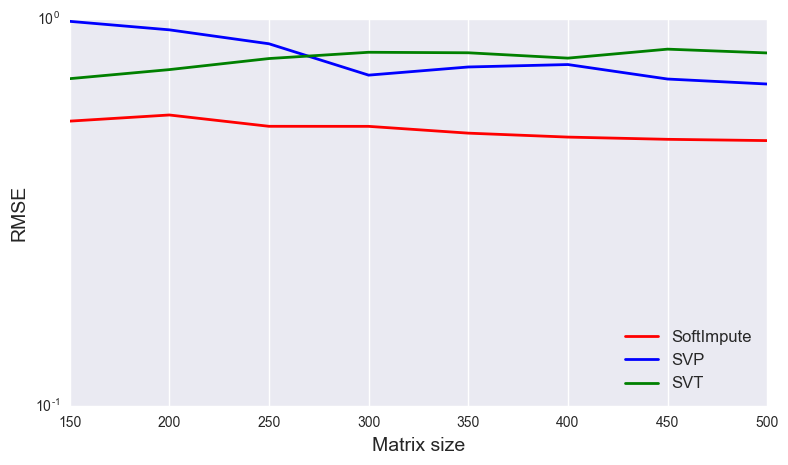

In [25]:
plt.figure(figsize=(9,5))
plt.semilogy(size_array, RMSE_si, 'r', linewidth=2)
plt.semilogy(size_array, RMSE_svp, 'b', linewidth=2)
plt.semilogy(size_array, RMSE_svt, 'g', linewidth=2)
plt.legend(['SoftImpute', 'SVP', 'SVT'], loc=4,  fontsize=12)
plt.xlabel('Matrix size', fontsize=14)
plt.ylabel('RMSE', fontsize=14)
plt.savefig('./results/real/exper_3/real_size_rmse.png')
plt.show()

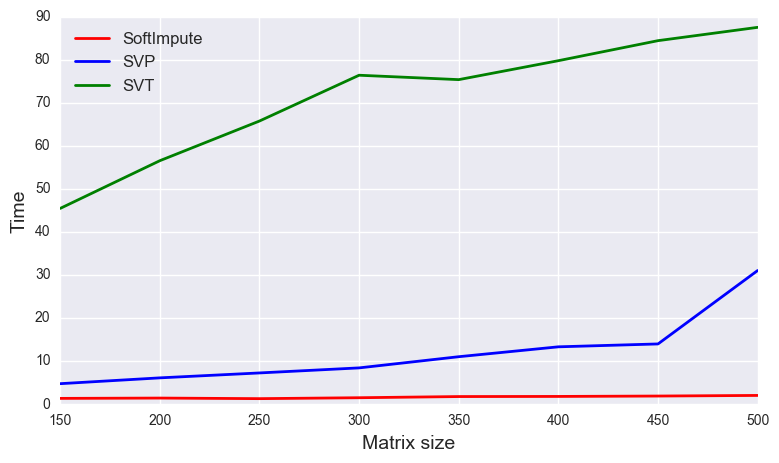

In [27]:
plt.figure(figsize=(9,5))
plt.plot(size_array, time_si, 'r', linewidth=2)
plt.plot(size_array, time_svp, 'b', linewidth=2)
plt.plot(size_array, time_svt, 'g', linewidth=2)
plt.legend(['SoftImpute', 'SVP', 'SVT'], loc=2,  fontsize=12)
plt.xlabel('Matrix size', fontsize=14)
plt.ylabel('Time', fontsize=14)
plt.savefig('./results/real/exper_3/real_size_time.png')
plt.show()